In [593]:
#import libraries and packages needed
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [594]:
train = pd.read_csv("data/train.csv")

In [595]:
#analyzing the numerical variables of the training dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [596]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [597]:
len(train)

614

In [598]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [599]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [600]:
train.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [601]:
#function to determine feature importance
def feature_importance(X,y):
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

## For simplicity sake lets take only rows that have complete data

In [602]:
train = train.drop(['Loan_ID'],axis=1)
train_full = train.dropna()

In [603]:
len(train_full)

480

In [604]:
kfold = KFold(n_splits=10, random_state=7)

In [605]:
cate_str_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

In [606]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [607]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [608]:
train_full_cat = train_full[cate_str_cols]

In [609]:
# TODO: create a LabelEncoder object and fit it to each feature in train_cat

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
train_full_cat_code = train_full_cat.apply(le.fit_transform)
train_full_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
5,1,1,2,0,1,2


In [610]:
X = pd.concat([train_full_cat_code,train_full[num_cols]],axis=1)
y = train_full['Loan_Status']

In [611]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Feature ranking:
1. feature 10 (0.268761)
2. feature 8 (0.181356)
3. feature 6 (0.177779)
4. feature 7 (0.113476)
5. feature 2 (0.059971)
6. feature 5 (0.058446)
7. feature 9 (0.053106)
8. feature 1 (0.022115)
9. feature 0 (0.021965)
10. feature 4 (0.021613)
11. feature 3 (0.021411)


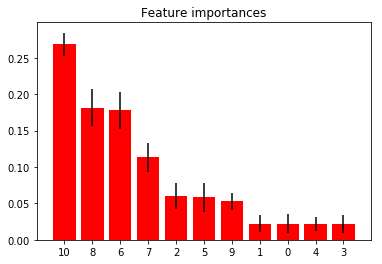

In [612]:
feature_importance(X,y)

In [613]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)

###### Mean accuracy of a model built on just numeric columns is 73%

In [614]:
print(results.mean())

0.685416666667


Building a model with just the top 7 features
['Dependents','Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [615]:
X = X[['Dependents','Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]

In [616]:
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.677083333333


Feature ranking:
1. feature 6 (0.275089)
2. feature 2 (0.223265)
3. feature 4 (0.216318)
4. feature 3 (0.132442)
5. feature 5 (0.058621)
6. feature 0 (0.051676)
7. feature 1 (0.042589)


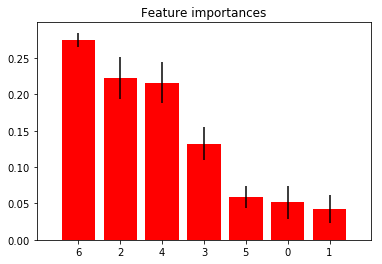

In [617]:
feature_importance(X,y)

In [618]:
X = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]

In [619]:
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.733333333333


Feature ranking:
1. feature 0 (0.284651)
2. feature 4 (0.279888)
3. feature 2 (0.245868)
4. feature 1 (0.138202)
5. feature 3 (0.051392)


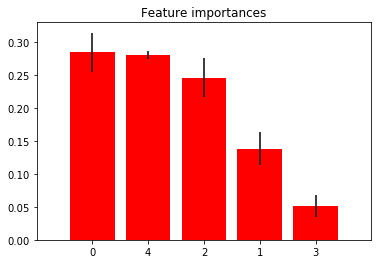

In [620]:
feature_importance(X,y)

## Treat missing values

###### findout the missing values for all categorical variables

In [621]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010520E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001081B550>]], dtype=object)

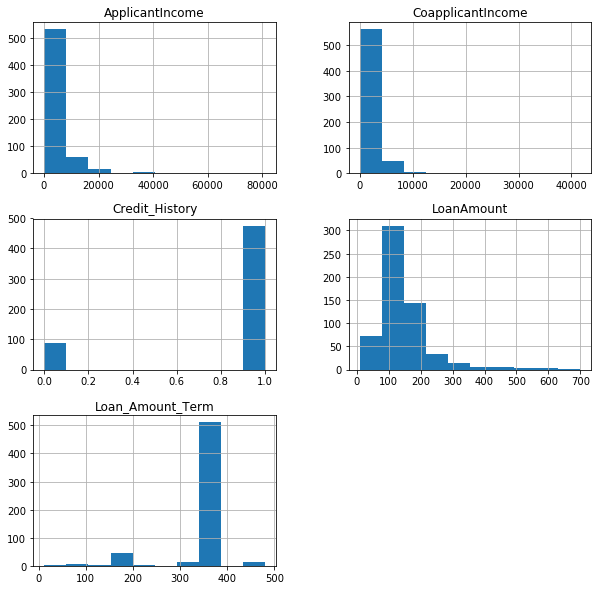

In [622]:
train.hist(figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010C4A828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000109E8A20>], dtype=object)

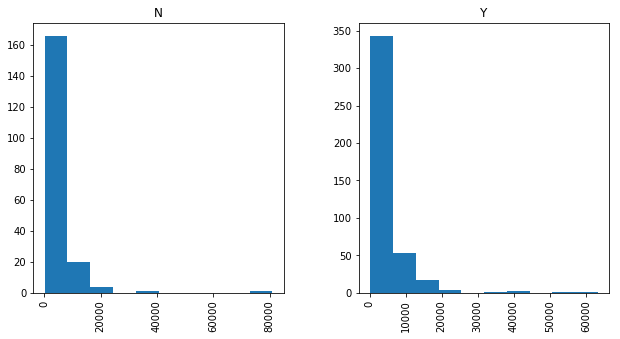

In [623]:
train[['ApplicantIncome','Loan_Status']].hist(by=['Loan_Status'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010AB1A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B56CC0>], dtype=object)

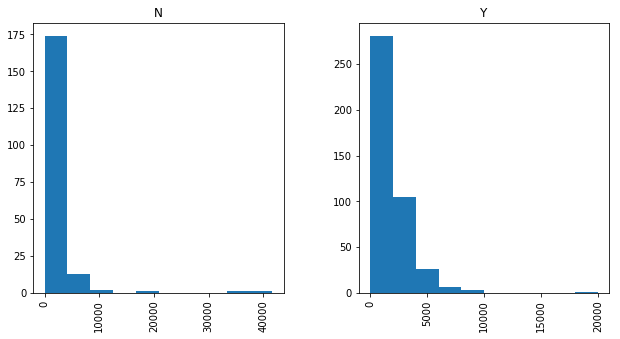

In [624]:
train[['CoapplicantIncome','Loan_Status']].hist(by=['Loan_Status'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001063B320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001057B710>], dtype=object)

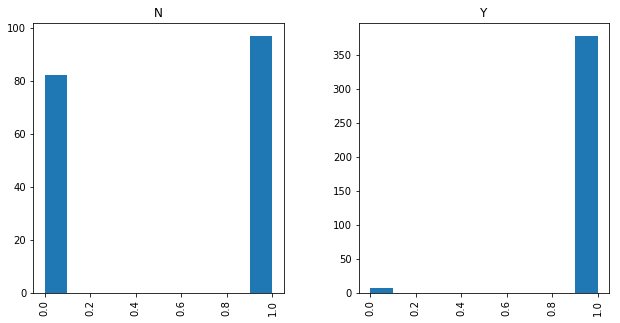

In [625]:
train[['Credit_History','Loan_Status']].hist(by=['Loan_Status'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010643710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E44390>], dtype=object)

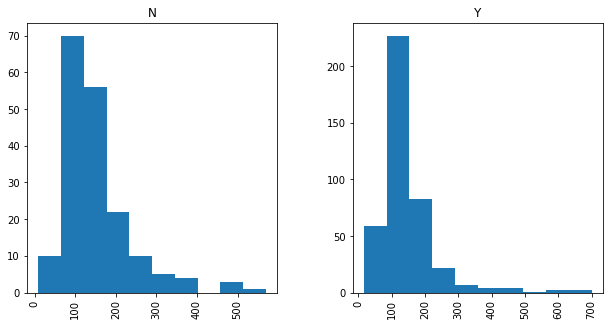

In [626]:
train[['LoanAmount','Loan_Status']].hist(by=['Loan_Status'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EF7A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010FA57B8>], dtype=object)

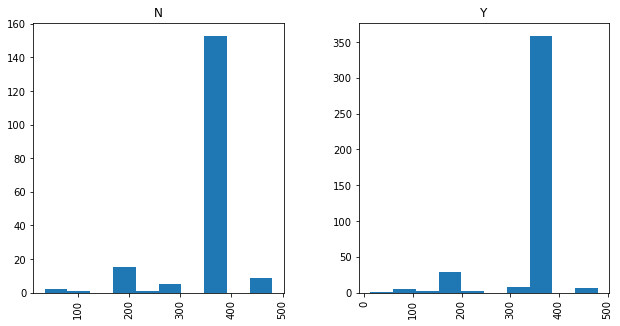

In [627]:
train[['Loan_Amount_Term','Loan_Status']].hist(by=['Loan_Status'], figsize=(10,5))

In [628]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

##### Fill out NA values in categorical values with -999

In [629]:
# #train_imp1 = train
# train_imp1['Gender'].fillna('-999',inplace=True)
# train_imp1['Married'].fillna('-999',inplace=True)
# train_imp1['Dependents'].fillna('-999',inplace=True)
# train_imp1['Self_Employed'].fillna('-999',inplace=True)

##### Fill out NA values in categorical values with majority class value

In [630]:
train[train['Credit_History'].isnull()].groupby(['Loan_Status']).size()

Loan_Status
N    13
Y    37
dtype: int64

In [631]:
train_imp1 = train

Assigning credit_history values according to the loan status values. Whenever the credit history was not available the loan status has been N so lets assign 0.0 to rows whose Loan status has been 'N'

In [632]:
train_imp1.loc[pd.isnull(train_imp1['Credit_History']) & (train_imp1['Loan_Status'] == 'N'),'Credit_History'] = 0.0

In [633]:
# train_imp1.loc[pd.isnull(train_imp1['Credit_History']) & (train_imp1['Loan_Status'] == 'Y'),'Credit_History'] = 1.0

In [634]:
train_imp1.groupby(['Gender']).size()
# Male

Gender
Female    112
Male      489
dtype: int64

In [635]:
train_imp1.loc[pd.isnull(train_imp1['Gender']),'Gender'] = 'Male'

In [636]:
train_imp1.groupby(['Married']).size()
# Yes

Married
No     213
Yes    398
dtype: int64

In [637]:
train_imp1.loc[pd.isnull(train_imp1['Married']),'Married'] = 'Yes'

In [638]:
train_imp1.groupby(['Dependents']).size()
#0

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [639]:
train_imp1.loc[pd.isnull(train_imp1['Dependents']),'Dependents'] = '0'

In [640]:
train_imp1.groupby(['Self_Employed']).size()
# No

Self_Employed
No     500
Yes     82
dtype: int64

In [641]:
train_imp1.loc[pd.isnull(train_imp1['Self_Employed']),'Self_Employed'] = 'No'

In [642]:
train_imp1.apply(lambda x: sum(x.isnull()),axis=0)

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       37
Property_Area         0
Loan_Status           0
dtype: int64

In [643]:
train_full_gp = train_full.groupby(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Status']).median()

In [644]:
train_full_gp.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [645]:
train_full_gp.to_csv('train_full_gp.csv',index='false')

In [646]:
train_imp2 = train_imp1.join(train_full_gp,on=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Status'],
                          lsuffix='_full', rsuffix='_grouped',how='left')

In [647]:
train_imp2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,Loan_Status,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,3541.5,0.0,117.5,360.0,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4283.0,1917.0,146.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.0,188.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2333.0,2358.0,115.0,360.0,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3541.5,0.0,117.5,360.0,1.0


In [648]:
train_imp2.to_csv('train_imp2.csv',index='false')

In [649]:
train_imp2['Credit_History_grouped'] = train_imp2['Credit_History_grouped'].apply(lambda x: 1 if x>0 else 0 )

In [650]:
train_imp2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,Loan_Status,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,3541.5,0.0,117.5,360.0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4283.0,1917.0,146.0,360.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.0,188.0,360.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2333.0,2358.0,115.0,360.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3541.5,0.0,117.5,360.0,1


In [651]:
train_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome_full          0
CoapplicantIncome_full        0
LoanAmount_full              22
Loan_Amount_Term_full        14
Credit_History_full          37
Property_Area                 0
Loan_Status                   0
ApplicantIncome_grouped      22
CoapplicantIncome_grouped    22
LoanAmount_grouped           22
Loan_Amount_Term_grouped     22
Credit_History_grouped        0
dtype: int64

In [652]:
def fillmissing_LA(row):
    if(pd.isnull(row['LoanAmount_full'])):
        return row['LoanAmount_grouped']
    else:
        return row['LoanAmount_full']

In [653]:
train_imp2.loc[:,'LoanAmount_full'] = train_imp2.apply(fillmissing_LA,axis=1)

In [654]:
def fillmissing_LAT(row):
    if(pd.isnull(row['Loan_Amount_Term_full'])):
        return row['Loan_Amount_Term_grouped']
    else:
        return row['Loan_Amount_Term_full']

In [655]:
train_imp2.loc[:,'Loan_Amount_Term_full'] = train_imp2.apply(fillmissing_LAT,axis=1)

In [656]:
def fillmissing_CH(row):
    if(pd.isnull(row['Credit_History_full'])):
        return row['Credit_History_grouped']
    else:
        return row['Credit_History_full']

In [657]:
train_imp2.loc[:,'Credit_History_full'] = train_imp2.apply(fillmissing_CH,axis=1)

In [658]:
train_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome_full          0
CoapplicantIncome_full        0
LoanAmount_full               2
Loan_Amount_Term_full         4
Credit_History_full           0
Property_Area                 0
Loan_Status                   0
ApplicantIncome_grouped      22
CoapplicantIncome_grouped    22
LoanAmount_grouped           22
Loan_Amount_Term_grouped     22
Credit_History_grouped        0
dtype: int64

Drop grouped by columns

In [659]:
train_imp2=train_imp2.drop(['ApplicantIncome_grouped','CoapplicantIncome_grouped','LoanAmount_grouped','Loan_Amount_Term_grouped'],axis=1)

Fill remaining NA values with median values

In [660]:
train_imp2['LoanAmount_full'].median()

127.5

In [661]:
train_imp2['LoanAmount_full'].head()

0    117.5
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount_full, dtype: float64

In [662]:
train_imp2['LoanAmount_full'] = train_imp2['LoanAmount_full'].apply(lambda x: 127.0 if pd.isnull(x) else x)

In [663]:
train_imp2['Loan_Amount_Term_full'].median()

360.0

In [664]:
train_imp2['Loan_Amount_Term_full']=train_imp2['Loan_Amount_Term_full'].apply(lambda x: 360.0 if pd.isnull(x) else x)

In [665]:
train_imp2['Credit_History_full'].median()

1.0

In [666]:
train_imp2['Credit_History_full'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History_full, dtype: float64

In [667]:
train_imp2['Credit_History_full'] = train_imp2['Credit_History_full'].apply(lambda x: 1.0 if pd.isnull(x) else x)

In [668]:
train_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome_full      0
CoapplicantIncome_full    0
LoanAmount_full           0
Loan_Amount_Term_full     0
Credit_History_full       0
Property_Area             0
Loan_Status               0
Credit_History_grouped    0
dtype: int64

## Outlier Treatment

In [669]:
train_imp2.select_dtypes(include=['number']).columns

Index(['ApplicantIncome_full', 'CoapplicantIncome_full', 'LoanAmount_full',
       'Loan_Amount_Term_full', 'Credit_History_full',
       'Credit_History_grouped'],
      dtype='object')

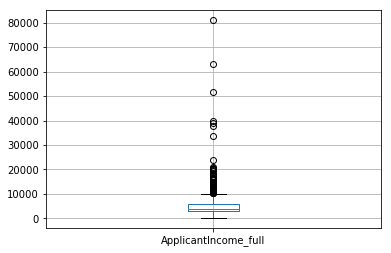

In [670]:
train_imp2.boxplot("ApplicantIncome_full")

In [671]:
len(train_imp2[train_imp2["ApplicantIncome_full"]> 10000])

52

In [672]:
#capping the values with the highest value
train_imp2.loc[train_imp2["ApplicantIncome_full"]> 10000, "ApplicantIncome_full"] = 10000

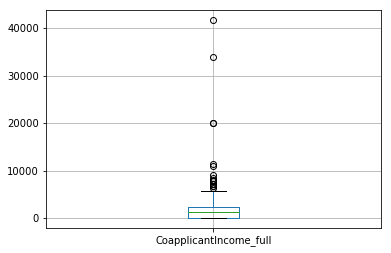

In [673]:
train_imp2.boxplot("CoapplicantIncome_full")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011190588>]], dtype=object)

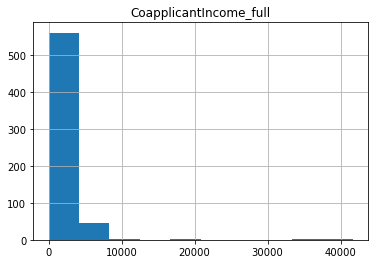

In [674]:
train_imp2.hist("CoapplicantIncome_full")

In [675]:
len(train_imp2[train_imp2["CoapplicantIncome_full"]> 6000])

18

In [676]:
#capping the values with the highest value
train_imp2.loc[train_imp2["CoapplicantIncome_full"]> 6500, "CoapplicantIncome_full"] = 6500

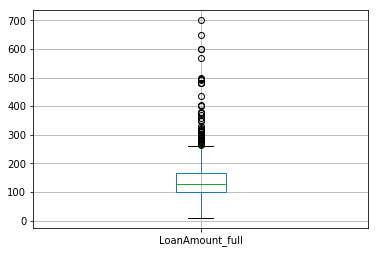

In [677]:
train_imp2.boxplot("LoanAmount_full")

In [678]:
len(train_imp2[train_imp2["LoanAmount_full"]> 270])

39

In [679]:
#capping the values with the highest value
train_imp2.loc[train_imp2["LoanAmount_full"]> 270, "LoanAmount_full"] = 270

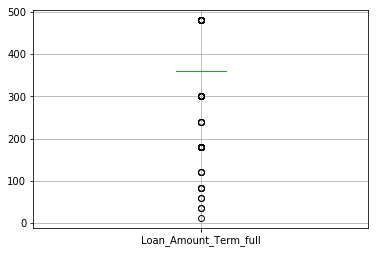

In [680]:
train_imp2.boxplot("Loan_Amount_Term_full")

In [681]:
len(train_imp2[train_imp2["Loan_Amount_Term_full"]< 360])

73

In [682]:
train_imp2.groupby("Loan_Amount_Term_full").size()

Loan_Amount_Term_full
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
dtype: int64

In [683]:
len(train_imp2)

614

## Feature Engineering

##### section to identify variable importance

In [684]:
# train_cat_code.head()

In [685]:
# train[num_cols].head()

In [686]:
# X_imp = pd.concat([train_cat_code,train[num_cols]],axis=1)

In [687]:
# X_imp.head()

In [688]:
# X_imp.apply(lambda x: sum(x.isnull()),axis=0)

###### bin continous variables

In [689]:
# train.select_dtypes(include=['number']).columns

In [690]:
# train['ApplicantIncome'].hist(bins=10);

In [691]:
# inc_bin_names = ['0','1','2','3','4','5','6','7','8','9']

In [692]:
# categories = pd.cut(train['ApplicantIncome'],10, labels=inc_bin_names)

In [693]:
# categories.unique()

In [694]:
# train['inc_bins'] = categories

In [695]:
# train['CoapplicantIncome'].hist()

In [696]:
# co_inc_bin_names = ['0','1','2','3','4','5','6']

In [697]:
# categories = pd.cut(train['CoapplicantIncome'], 7,labels=co_inc_bin_names)

In [698]:
# train['co_inc_bins'] = categories

In [699]:
# train.hist(column=['LoanAmount'])

In [700]:
# LA_bin_names = ['0','1','2','3','4']
# categories = pd.cut(train['LoanAmount'],5,labels=LA_bin_names)

In [701]:
# train['LA_bins'] = categories

In [702]:
# train.hist(column=['Loan_Amount_Term'])

In [703]:
# train['Loan_Amount_Term'].unique()

In [704]:
# train['Credit_History'].unique()

<i>Leaving Loan Amount term, credit history as is because they have discrete values</i>

##### creating new features

In [705]:
#adding ApplicantIncome + CoapplicantIncome as Income
train_imp2['Income'] = train_imp2['ApplicantIncome_full'] + train_imp2['CoapplicantIncome_full']

In [706]:
#converting string value to number for dependents
def dependents_str_to_num(dep):
    if(dep =='0'):
        return 1
    elif(dep =='1'):
        return 2
    elif(dep =='2'):
        return 3
    elif(dep =='3+'):
        return 4    

In [707]:
train_imp2['Dependents_num'] = train_imp2['Dependents'].apply(dependents_str_to_num)

In [708]:
# train_imp2['Income_per_dep_cube'] = np.power(train_imp2['Income'] / train_imp2['Dependents_num'],3)

In [709]:
train_imp2['Income_per_dep'] = train_imp2['Income'] / train_imp2['Dependents_num']

In [710]:
# train_imp2['LA_per_Income_sq'] = np.power(((train_imp2['LoanAmount_full'] * 1000) / train_imp2['Income']),2)

In [711]:
train_imp2['LA_per_Income'] = (train_imp2['LoanAmount_full'] * 1000) / train_imp2['Income']

In [712]:
#train_imp2['Income_cube'] = np.power(train_imp2['Income'],3)

In [713]:
train_imp2['Income_cube_root'] = np.power(train_imp2['Income'],1/3)

In [714]:
# train_imp2['LAT_sq'] = np.power(train_imp2['Loan_Amount_Term_full'],2)

In [715]:
train_imp2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,Loan_Status,Credit_History_grouped,Income,Dependents_num,Income_per_dep,LA_per_Income,Income_cube_root
0,Male,No,0,Graduate,No,5849,0.0,117.5,360.0,1.0,Urban,Y,1,5849.0,1,5849.0,20.088904,18.017473
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,6091.0,2,3045.5,21.014612,18.262611
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,3000.0,1,3000.0,22.000000,14.422496
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4941.0,1,4941.0,24.286582,17.032234
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,6000.0,1,6000.0,23.500000,18.171206


In [716]:
train_imp2.select_dtypes(include=['number']).columns

Index(['ApplicantIncome_full', 'CoapplicantIncome_full', 'LoanAmount_full',
       'Loan_Amount_Term_full', 'Credit_History_full',
       'Credit_History_grouped', 'Income', 'Dependents_num', 'Income_per_dep',
       'LA_per_Income', 'Income_cube_root'],
      dtype='object')

In [717]:
# X_imp = pd.concat([train_cat_code,train[['Income','LoanAmount','Loan_Amount_Term', 'Credit_History']]],axis=1)
X_imp = train_imp2

In [718]:
X_imp.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome_full', 'CoapplicantIncome_full', 'LoanAmount_full',
       'Loan_Amount_Term_full', 'Credit_History_full', 'Property_Area',
       'Loan_Status', 'Credit_History_grouped', 'Income', 'Dependents_num',
       'Income_per_dep', 'LA_per_Income', 'Income_cube_root'],
      dtype='object')

In [719]:
y=train_imp2['Loan_Status']

In [720]:
# feature_importance(X_imp,y)

#####  check multi-colinearity

In [721]:
print(X_imp.corr())

                        ApplicantIncome_full  CoapplicantIncome_full  \
ApplicantIncome_full                1.000000               -0.220440   
CoapplicantIncome_full             -0.220440                1.000000   
LoanAmount_full                     0.562232                0.270758   
Loan_Amount_Term_full              -0.024281               -0.032190   
Credit_History_full                 0.047794               -0.013277   
Credit_History_grouped              0.087688                0.035498   
Income                              0.783850                0.432883   
Dependents_num                      0.112172               -0.025389   
Income_per_dep                      0.470268                0.321424   
LA_per_Income                      -0.293057               -0.183764   
Income_cube_root                    0.769804                0.430063   

                        LoanAmount_full  Loan_Amount_Term_full  \
ApplicantIncome_full           0.562232              -0.024281   
Coa

#####  feature selection

Lets go with the most important 4 features ['Income','LoanAmount','Loan_Amount_Term', 'Credit_History']

In [722]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X_new = SelectKBest(chi2, k=5).fit_transform(X_imp, y)
# X_new.shape

##### one hot encoding categorical variables

In [723]:
train_imp2.dtypes

Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome_full        int64
CoapplicantIncome_full    float64
LoanAmount_full           float64
Loan_Amount_Term_full     float64
Credit_History_full       float64
Property_Area              object
Loan_Status                object
Credit_History_grouped      int64
Income                    float64
Dependents_num              int64
Income_per_dep            float64
LA_per_Income             float64
Income_cube_root          float64
dtype: object

In [724]:
cate_feat=train_imp2.select_dtypes(include=['object']).columns

In [725]:
train_cat=train_imp2[cate_feat].drop(['Loan_Status'],axis=1)
cate_feat = train_cat.columns

In [726]:
train_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [727]:
len(train_cat)

614

In [728]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [729]:
# TODO: create a LabelEncoder object and fit it to each feature in train_cat

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
train_cat_code = train_cat.apply(le.fit_transform)
train_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [730]:
train_cat_code.shape

(614, 6)

In [731]:
train_cat_code['Gender'].unique()

array([1, 0], dtype=int64)

In [732]:
train_cat_code['Married'].unique()

array([0, 1], dtype=int64)

In [733]:
train_cat_code['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [734]:
train_cat_code['Education'].unique()

array([0, 1], dtype=int64)

In [735]:
train_cat_code['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [736]:
train_cat_code['Property_Area'].unique()

array([2, 0, 1], dtype=int64)

In [737]:
# TODO: create a OneHotEncoder object, and fit it to all of train_cat_code

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_cat_code)

# 3. Transform
train_cat_one_hot = enc.transform(train_cat_code).toarray()
train_cat_one_hot.shape

# as you can see, you've the same number of rows 
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(614, 15)

In [738]:
lb = preprocessing.LabelBinarizer()
Loan_Status_bin = lb.fit_transform(train['Loan_Status'])
Loan_Status_bin.reshape(614,)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0,

In [739]:
#Preprocess all numeric features by rescaling and standardization 

In [740]:
num_cols= train_imp2.select_dtypes(include=['number']).columns

In [741]:
print(num_cols)

Index(['ApplicantIncome_full', 'CoapplicantIncome_full', 'LoanAmount_full',
       'Loan_Amount_Term_full', 'Credit_History_full',
       'Credit_History_grouped', 'Income', 'Dependents_num', 'Income_per_dep',
       'LA_per_Income', 'Income_cube_root'],
      dtype='object')


In [742]:
num_cols=['Credit_History_full','Income_per_dep','LA_per_Income','Loan_Amount_Term_full','Income_cube_root']

In [743]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(train_imp2[num_cols])
rescaled_num_cols = scaler.transform(train_imp2[num_cols])

In [744]:
set_printoptions(precision=3)
print(rescaled_num_cols[0:5,:])

[[ 0.462  0.531 -0.504  0.273  0.065]
 [ 0.462 -0.515 -0.389  0.273  0.161]
 [ 0.462 -0.532 -0.267  0.273 -1.343]
 [ 0.462  0.192  0.015  0.273 -0.321]
 [ 0.462  0.587 -0.082  0.273  0.125]]


In [745]:
# numcols = train[['Loan_Amount_Term','Credit_History','co_inc_bins','inc_bins','LA_bins']].as_matrix()

In [746]:
X = np.concatenate((train_cat_one_hot,rescaled_num_cols),axis=1)
# X = rescaled_num_cols
X.shape

(614, 20)

In [747]:
y = Loan_Status_bin.reshape(614,)

In [748]:
type(y)

numpy.ndarray

In [749]:
y.shape

(614,)

### section to spot test multiple classification algorithms

In [750]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X, y)
results_DT = cross_val_score(model_DT, X, y, cv=kfold)
print(results_DT.mean())

0.711845584347


In [751]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X, y)
results_LR = cross_val_score(model_LR, X, y, cv=kfold)
print(results_LR.mean())

0.817689053411


In [752]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X, y)
results_LDA = cross_val_score(model_LDA, X, y, cv=kfold)
print(results_LDA.mean())

0.817689053411


D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are col

In [753]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X, y)
results_KNN = cross_val_score(model_KNN, X, y, cv=kfold)
print(results_KNN.mean())

0.801401374934


In [754]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X, y)
results_NB = cross_val_score(model_NB, X, y, cv=kfold)
print(results_NB.mean())

0.817715494447


### Ensemble techniques

#### Bagging

In [755]:
seed = 7

In [756]:
#Bagged decision trees
from sklearn.ensemble import BaggingClassifier
num_trees = 100
model_BC = BaggingClassifier(base_estimator=model_DT, n_estimators=num_trees, random_state=seed)
model_BC.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.715018508726


In [757]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_RF.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.718350079323


#### Boosting

In [758]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model_ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model_ada.fit(X,y)
results = cross_val_score(model_ada, X, y, cv=kfold)
print(results.mean())

0.817715494447


In [759]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=20, random_state=seed)
model_GB = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model_GB.fit(X,y)
results = cross_val_score(model_GB, X, y, cv=kfold)
print(results.mean())

0.824247311828


### Section to score the test dataset

as a first step score only rows with complete data

In [760]:
#test_dropna = read_csv("data/test.csv").dropna()

In [761]:
#test_short = test_dropna[num_cols]

In [762]:
#out = pd.Series(model.predict(test_short),name='Loan_Status')

In [763]:
# test_dropna = test_dropna.reset_index()

In [764]:
# test_dropna.head()

In [765]:
# output = pd.concat([test_dropna['Loan_ID'],out],axis=1)

In [766]:
# .to_csv('sample_submissions.csv',index=False)

###### second step: score the test data after imputing for missing values

In [767]:
test = read_csv("data/test.csv")
test_full = test.dropna()

###### findout the missing values for all categorical variables

In [768]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Fill out NA values in categorical values with -999

In [769]:
# test_imp1 = test
# test_imp1['Gender'].fillna('-999',inplace=True)
# test_imp1['Married'].fillna('-999',inplace=True)
# test_imp1['Dependents'].fillna('-999',inplace=True)
# test_imp1['Self_Employed'].fillna('-999',inplace=True)

##### Fill out NA values in categorical values with majority class value

In [770]:
test_imp1 = test

In [771]:
test_imp1.groupby(['Gender']).size()

Gender
Female     70
Male      286
dtype: int64

In [772]:
test_imp1.loc[pd.isnull(test_imp1['Gender']),'Gender'] = 'Male'

In [773]:
test_imp1.groupby(['Dependents']).size()

Dependents
0     200
1      58
2      59
3+     40
dtype: int64

In [774]:
test_imp1.loc[pd.isnull(test_imp1['Dependents']),'Dependents'] = '0'

In [775]:
test_imp1.groupby(['Self_Employed']).size()

Self_Employed
No     307
Yes     37
dtype: int64

In [776]:
test_imp1.loc[pd.isnull(test_imp1['Self_Employed']),'Self_Employed'] = 'No'

In [777]:
test_imp1.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [778]:
test_full_gp = test_full.groupby(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']).median()

In [779]:
test_full_gp.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [780]:
test_full_gp.to_csv('test_full_gp.csv',index='false')

In [781]:
test_imp2 = test_imp1.join(test_full_gp,on=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],
                          lsuffix='_full', rsuffix='_grouped',how='left')

In [782]:
test_imp2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,3452.0,1663.0,124.5,360.0,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,3747.0,1707.0,124.0,360.0,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4470.5,910.0,147.5,360.0,1.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4470.5,910.0,147.5,360.0,1.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3183.5,0.0,84.0,360.0,1.0


In [783]:
test_imp2.to_csv('train_imp2.csv',index='false')

In [784]:
test_imp2['Credit_History_grouped'] = test_imp2['Credit_History_grouped'].apply(lambda x: 1 if x>0 else 0 )

In [785]:
test_imp2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,3452.0,1663.0,124.5,360.0,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,3747.0,1707.0,124.0,360.0,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4470.5,910.0,147.5,360.0,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4470.5,910.0,147.5,360.0,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3183.5,0.0,84.0,360.0,1


In [786]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                       0
Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome_full          0
CoapplicantIncome_full        0
LoanAmount_full               5
Loan_Amount_Term_full         6
Credit_History_full          29
Property_Area                 0
ApplicantIncome_grouped       8
CoapplicantIncome_grouped     8
LoanAmount_grouped            8
Loan_Amount_Term_grouped      8
Credit_History_grouped        0
dtype: int64

In [787]:
def fillmissing_LA(row):
    if(pd.isnull(row['LoanAmount_full'])):
        return row['LoanAmount_grouped']
    else:
        return row['LoanAmount_full']

In [788]:
test_imp2.loc[:,'LoanAmount_full'] = test_imp2.apply(fillmissing_LA,axis=1)

In [789]:
def fillmissing_LAT(row):
    if(pd.isnull(row['Loan_Amount_Term_full'])):
        return row['Loan_Amount_Term_grouped']
    else:
        return row['Loan_Amount_Term_full']

In [790]:
test_imp2.loc[:,'Loan_Amount_Term_full'] = test_imp2.apply(fillmissing_LAT,axis=1)

In [791]:
def fillmissing_CH(row):
    if(pd.isnull(row['Credit_History_full'])):
        return row['Credit_History_grouped']
    else:
        return row['Credit_History_full']

In [792]:
test_imp2.loc[:,'Credit_History_full'] = test_imp2.apply(fillmissing_CH,axis=1)

In [793]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                      0
Gender                       0
Married                      0
Dependents                   0
Education                    0
Self_Employed                0
ApplicantIncome_full         0
CoapplicantIncome_full       0
LoanAmount_full              0
Loan_Amount_Term_full        1
Credit_History_full          0
Property_Area                0
ApplicantIncome_grouped      8
CoapplicantIncome_grouped    8
LoanAmount_grouped           8
Loan_Amount_Term_grouped     8
Credit_History_grouped       0
dtype: int64

Drop grouped by columns

In [794]:
test_imp2=test_imp2.drop(['ApplicantIncome_grouped','CoapplicantIncome_grouped','LoanAmount_grouped','Loan_Amount_Term_grouped','Credit_History_grouped'],axis=1)

Fill remaining NA values with median values

In [795]:
test_imp2['LoanAmount_full'].median()

125.0

In [796]:
test_imp2['LoanAmount_full'].head()

0    110.0
1    126.0
2    208.0
3    100.0
4     78.0
Name: LoanAmount_full, dtype: float64

In [797]:
test_imp2['LoanAmount_full'] = test_imp2['LoanAmount_full'].apply(lambda x: 125.0 if pd.isnull(x) else x)

In [798]:
test_imp2['Loan_Amount_Term_full'].median()

360.0

In [799]:
test_imp2['Loan_Amount_Term_full']=test_imp2['Loan_Amount_Term_full'].apply(lambda x: 360.0 if pd.isnull(x) else x)

In [800]:
test_imp2['Credit_History_full'].median()

1.0

In [801]:
test_imp2['Credit_History_full'] = test_imp2['Credit_History_full'].apply(lambda x: 1.0 if pd.isnull(x) else x)

In [802]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome_full      0
CoapplicantIncome_full    0
LoanAmount_full           0
Loan_Amount_Term_full     0
Credit_History_full       0
Property_Area             0
dtype: int64

In [803]:
#update all missing columns with majority class 
# test.loc[pd.isnull(test['Gender']),'Gender'] = 'Male'

In [804]:
# test.loc[pd.isnull(test['Dependents']),'Dependents'] = '0'

In [805]:
# test.loc[pd.isnull(test['Self_Employed']),'Self_Employed'] ='No'

In [806]:
# test.loc[pd.isnull(test['Credit_History']),'Credit_History'] = 1.0

In [807]:
# test.loc[pd.isnull(test['Loan_Amount_Term']),'Loan_Amount_Term'] =360.0

In [808]:
# test.boxplot('LoanAmount')

In [809]:
# test.loc[pd.isnull(test['LoanAmount']),'LoanAmount'] =130.0

In [810]:
# test.apply(lambda x: sum(x.isnull()),axis=0)

In [811]:
# test.columns

<b>Treat outlier values</b>

In [812]:
#capping the values with the highest value
test_imp2.loc[test_imp2["ApplicantIncome_full"]> 10000, "ApplicantIncome_full"] = 10000

In [813]:
#capping the values with the highest value
test_imp2.loc[test_imp2["CoapplicantIncome_full"]> 6500, "CoapplicantIncome_full"] = 6500

In [814]:
#capping the values with the highest value
test_imp2.loc[test_imp2["LoanAmount_full"]> 270, "LoanAmount_full"] = 270

##### creating new features

In [815]:
test_imp2['Income'] = test_imp2['ApplicantIncome_full'] + test_imp2['CoapplicantIncome_full']

In [816]:
test_imp2['Dependents_num'] = test_imp2['Dependents'].apply(dependents_str_to_num)

In [817]:
test_imp2['Income_per_dep'] = test_imp2['Income'] / test_imp2['Dependents_num']

In [818]:
test_imp2['LA_per_Income'] = (test_imp2['LoanAmount_full'] * 1000) / test_imp2['Income']

In [819]:
# test_imp2['Income_cube'] = np.power(test_imp2['Income'],3)

In [820]:
test_imp2['Income_cube_root'] = np.power(test_imp2['Income'],1/3)

In [821]:
# test_imp2['Income_per_dep_cube'] = np.power(test_imp2['Income'] / test_imp2['Dependents_num'],3)

In [822]:
# test_imp2['LA_per_Income_sq'] = np.power(((test_imp2['LoanAmount_full'] * 1000) / test_imp2['Income']),2)

In [823]:
# test_imp2['LAT_sq'] = np.power(test_imp2['Loan_Amount_Term_full'],2)

##### encoding categorical variables

In [824]:
# test['inc_bins'] = pd.cut(test['ApplicantIncome'],10, labels=inc_bin_names)

In [825]:
# test['co_inc_bins'] = pd.cut(test['CoapplicantIncome'], 7,labels=co_inc_bin_names)

In [826]:
# test['LA_bins'] = pd.cut(test['LoanAmount'],5,labels=LA_bin_names)

In [827]:
test_cat = test_imp2[cate_feat]

In [828]:
test_cat_code = test_cat.apply(le.fit_transform)
test_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,1,0,0,0,2
1,1,1,1,0,0,2
2,1,1,2,0,0,2
3,1,1,2,0,0,2
4,1,0,0,1,0,2


In [829]:
test_cat_code['Gender'].unique()

array([1, 0], dtype=int64)

In [830]:
test_cat_code['Married'].unique()

array([1, 0], dtype=int64)

In [831]:
test_cat_code['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [832]:
test_cat_code['Education'].unique()

array([0, 1], dtype=int64)

In [833]:
test_cat_code['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [834]:
test_cat_code['Property_Area'].unique()

array([2, 1, 0], dtype=int64)

In [835]:
test_cat_code.shape

(367, 6)

In [836]:
enc.fit(test_cat_code)

# 3. Transform
test_cat_one_hot = enc.transform(test_cat_code).toarray()
test_cat_one_hot.shape

(367, 15)

<b>Standardizing/rescaling the test features</b>

In [837]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(test_imp2[num_cols])
rescaled_test_num_cols = scaler.transform(test_imp2[num_cols])

In [838]:
set_printoptions(precision=3)
print(rescaled_test_num_cols[0:5,:])

[[ 0.455  0.639 -0.6    0.266  0.105]
 [ 0.455 -0.745  0.315  0.266 -0.443]
 [ 0.455 -0.754  0.651  0.266  0.559]
 [ 0.455 -1.011 -0.464  0.266 -0.286]
 [ 0.455 -0.347 -0.096  0.266 -1.19 ]]


In [839]:
# numcols_test = test_imp2[['Loan_Amount_Term','Credit_History','co_inc_bins','inc_bins','LA_bins']].as_matrix()

In [840]:
X_test = np.concatenate((test_cat_one_hot,rescaled_test_num_cols),axis=1)
X_test.shape

(367, 20)

In [841]:
out = pd.Series(model_DT.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_DT.csv',index=False)

In [842]:
out = pd.Series(model_LR.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_LR.csv',index=False)

In [843]:
out = pd.Series(model_NB.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_NB.csv',index=False)

In [844]:
out = pd.Series(model_ada.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_ADA.csv',index=False)

In [845]:
out = pd.Series(model_GB.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_GB.csv',index=False)

### Section to score the test dataset

as a first step score only rows with complete data

In [846]:
#test_dropna = read_csv("data/test.csv").dropna()

In [847]:
#test_short = test_dropna[num_cols]

In [848]:
#out = pd.Series(model.predict(test_short),name='Loan_Status')

In [849]:
# test_dropna = test_dropna.reset_index()

In [850]:
# test_dropna.head()

In [851]:
# output = pd.concat([test_dropna['Loan_ID'],out],axis=1)

In [852]:
# .to_csv('sample_submissions.csv',index=False)

###### second step: score the test data after imputing for missing values

In [853]:
test = read_csv("data/test.csv")
test_full = test.dropna()

###### findout the missing values for all categorical variables

In [854]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Fill out NA values in categorical values with -999

In [855]:
# test_imp1 = test
# test_imp1['Gender'].fillna('-999',inplace=True)
# test_imp1['Married'].fillna('-999',inplace=True)
# test_imp1['Dependents'].fillna('-999',inplace=True)
# test_imp1['Self_Employed'].fillna('-999',inplace=True)

##### Fill out NA values in categorical values with majority class value

In [856]:
test_imp1 = test

In [857]:
test_imp1.groupby(['Gender']).size()

Gender
Female     70
Male      286
dtype: int64

In [858]:
test_imp1.loc[pd.isnull(test_imp1['Gender']),'Gender'] = 'Male'

In [859]:
test_imp1.groupby(['Dependents']).size()

Dependents
0     200
1      58
2      59
3+     40
dtype: int64

In [860]:
test_imp1.loc[pd.isnull(test_imp1['Dependents']),'Dependents'] = '0'

In [861]:
test_imp1.groupby(['Self_Employed']).size()

Self_Employed
No     307
Yes     37
dtype: int64

In [862]:
test_imp1.loc[pd.isnull(test_imp1['Self_Employed']),'Self_Employed'] = 'No'

In [863]:
test_imp1.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [864]:
test_full_gp = test_full.groupby(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']).median()

In [865]:
test_full_gp.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [866]:
test_full_gp.to_csv('test_full_gp.csv',index='false')

In [867]:
test_imp2 = test_imp1.join(test_full_gp,on=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],
                          lsuffix='_full', rsuffix='_grouped',how='left')

In [868]:
test_imp2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,3452.0,1663.0,124.5,360.0,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,3747.0,1707.0,124.0,360.0,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4470.5,910.0,147.5,360.0,1.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4470.5,910.0,147.5,360.0,1.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3183.5,0.0,84.0,360.0,1.0


In [869]:
test_imp2.to_csv('train_imp2.csv',index='false')

In [870]:
test_imp2['Credit_History_grouped'] = test_imp2['Credit_History_grouped'].apply(lambda x: 1 if x>0 else 0 )

In [871]:
test_imp2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_full,CoapplicantIncome_full,LoanAmount_full,Loan_Amount_Term_full,Credit_History_full,Property_Area,ApplicantIncome_grouped,CoapplicantIncome_grouped,LoanAmount_grouped,Loan_Amount_Term_grouped,Credit_History_grouped
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,3452.0,1663.0,124.5,360.0,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,3747.0,1707.0,124.0,360.0,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4470.5,910.0,147.5,360.0,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4470.5,910.0,147.5,360.0,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3183.5,0.0,84.0,360.0,1


In [872]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                       0
Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome_full          0
CoapplicantIncome_full        0
LoanAmount_full               5
Loan_Amount_Term_full         6
Credit_History_full          29
Property_Area                 0
ApplicantIncome_grouped       8
CoapplicantIncome_grouped     8
LoanAmount_grouped            8
Loan_Amount_Term_grouped      8
Credit_History_grouped        0
dtype: int64

In [873]:
def fillmissing_LA(row):
    if(pd.isnull(row['LoanAmount_full'])):
        return row['LoanAmount_grouped']
    else:
        return row['LoanAmount_full']

In [874]:
test_imp2.loc[:,'LoanAmount_full'] = test_imp2.apply(fillmissing_LA,axis=1)

In [875]:
def fillmissing_LAT(row):
    if(pd.isnull(row['Loan_Amount_Term_full'])):
        return row['Loan_Amount_Term_grouped']
    else:
        return row['Loan_Amount_Term_full']

In [876]:
test_imp2.loc[:,'Loan_Amount_Term_full'] = test_imp2.apply(fillmissing_LAT,axis=1)

In [877]:
def fillmissing_CH(row):
    if(pd.isnull(row['Credit_History_full'])):
        return row['Credit_History_grouped']
    else:
        return row['Credit_History_full']

In [878]:
test_imp2.loc[:,'Credit_History_full'] = test_imp2.apply(fillmissing_CH,axis=1)

In [879]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                      0
Gender                       0
Married                      0
Dependents                   0
Education                    0
Self_Employed                0
ApplicantIncome_full         0
CoapplicantIncome_full       0
LoanAmount_full              0
Loan_Amount_Term_full        1
Credit_History_full          0
Property_Area                0
ApplicantIncome_grouped      8
CoapplicantIncome_grouped    8
LoanAmount_grouped           8
Loan_Amount_Term_grouped     8
Credit_History_grouped       0
dtype: int64

Drop grouped by columns

In [880]:
test_imp2=test_imp2.drop(['ApplicantIncome_grouped','CoapplicantIncome_grouped','LoanAmount_grouped','Loan_Amount_Term_grouped','Credit_History_grouped'],axis=1)

Fill remaining NA values with median values

In [881]:
test_imp2['LoanAmount_full'].median()

125.0

In [882]:
test_imp2['LoanAmount_full'].head()

0    110.0
1    126.0
2    208.0
3    100.0
4     78.0
Name: LoanAmount_full, dtype: float64

In [883]:
test_imp2['LoanAmount_full'] = test_imp2['LoanAmount_full'].apply(lambda x: 125.0 if pd.isnull(x) else x)

In [884]:
test_imp2['Loan_Amount_Term_full'].median()

360.0

In [885]:
test_imp2['Loan_Amount_Term_full']=test_imp2['Loan_Amount_Term_full'].apply(lambda x: 360.0 if pd.isnull(x) else x)

In [886]:
test_imp2['Credit_History_full'].median()

1.0

In [887]:
test_imp2['Credit_History_full'] = test_imp2['Credit_History_full'].apply(lambda x: 1.0 if pd.isnull(x) else x)

In [888]:
test_imp2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome_full      0
CoapplicantIncome_full    0
LoanAmount_full           0
Loan_Amount_Term_full     0
Credit_History_full       0
Property_Area             0
dtype: int64

In [889]:
#update all missing columns with majority class 
# test.loc[pd.isnull(test['Gender']),'Gender'] = 'Male'

In [890]:
# test.loc[pd.isnull(test['Dependents']),'Dependents'] = '0'

In [891]:
# test.loc[pd.isnull(test['Self_Employed']),'Self_Employed'] ='No'

In [892]:
# test.loc[pd.isnull(test['Credit_History']),'Credit_History'] = 1.0

In [893]:
# test.loc[pd.isnull(test['Loan_Amount_Term']),'Loan_Amount_Term'] =360.0

In [894]:
# test.boxplot('LoanAmount')

In [895]:
# test.loc[pd.isnull(test['LoanAmount']),'LoanAmount'] =130.0

In [896]:
# test.apply(lambda x: sum(x.isnull()),axis=0)

In [897]:
# test.columns

<b>Treat outlier values</b>

In [898]:
#capping the values with the highest value
test_imp2.loc[test_imp2["ApplicantIncome_full"]> 10000, "ApplicantIncome_full"] = 10000

In [899]:
#capping the values with the highest value
test_imp2.loc[test_imp2["CoapplicantIncome_full"]> 6500, "CoapplicantIncome_full"] = 6500

In [900]:
#capping the values with the highest value
test_imp2.loc[test_imp2["LoanAmount_full"]> 270, "LoanAmount_full"] = 270

##### creating new features

In [901]:
test_imp2['Income'] = test_imp2['ApplicantIncome_full'] + test_imp2['CoapplicantIncome_full']

In [902]:
test_imp2['Dependents_num'] = test_imp2['Dependents'].apply(dependents_str_to_num)

In [903]:
test_imp2['Income_per_dep'] = test_imp2['Income'] / test_imp2['Dependents_num']

In [904]:
test_imp2['LA_per_Income'] = (test_imp2['LoanAmount_full'] * 1000) / test_imp2['Income']

In [905]:
# test_imp2['Income_cube'] = np.power(test_imp2['Income'],3)

In [906]:
test_imp2['Income_cube_root'] = np.power(test_imp2['Income'],1/3)

In [907]:
# test_imp2['Income_per_dep_cube'] = np.power(test_imp2['Income'] / test_imp2['Dependents_num'],3)

In [908]:
# test_imp2['LA_per_Income_sq'] = np.power(((test_imp2['LoanAmount_full'] * 1000) / test_imp2['Income']),2)

In [909]:
# test_imp2['LAT_sq'] = np.power(test_imp2['Loan_Amount_Term_full'],2)

##### encoding categorical variables

In [910]:
# test['inc_bins'] = pd.cut(test['ApplicantIncome'],10, labels=inc_bin_names)

In [911]:
# test['co_inc_bins'] = pd.cut(test['CoapplicantIncome'], 7,labels=co_inc_bin_names)

In [912]:
# test['LA_bins'] = pd.cut(test['LoanAmount'],5,labels=LA_bin_names)

In [913]:
test_cat = test_imp2[cate_feat]

In [914]:
test_cat_code = test_cat.apply(le.fit_transform)
test_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,1,0,0,0,2
1,1,1,1,0,0,2
2,1,1,2,0,0,2
3,1,1,2,0,0,2
4,1,0,0,1,0,2


In [915]:
test_cat_code['Gender'].unique()

array([1, 0], dtype=int64)

In [916]:
test_cat_code['Married'].unique()

array([1, 0], dtype=int64)

In [917]:
test_cat_code['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [918]:
test_cat_code['Education'].unique()

array([0, 1], dtype=int64)

In [919]:
test_cat_code['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [920]:
test_cat_code['Property_Area'].unique()

array([2, 1, 0], dtype=int64)

In [921]:
test_cat_code.shape

(367, 6)

In [922]:
enc.fit(test_cat_code)

# 3. Transform
test_cat_one_hot = enc.transform(test_cat_code).toarray()
test_cat_one_hot.shape

(367, 15)

<b>Standardizing/rescaling the test features</b>

In [923]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(test_imp2[num_cols])
rescaled_test_num_cols = scaler.transform(test_imp2[num_cols])

In [924]:
set_printoptions(precision=3)
print(rescaled_test_num_cols[0:5,:])

[[ 0.455  0.639 -0.6    0.266  0.105]
 [ 0.455 -0.745  0.315  0.266 -0.443]
 [ 0.455 -0.754  0.651  0.266  0.559]
 [ 0.455 -1.011 -0.464  0.266 -0.286]
 [ 0.455 -0.347 -0.096  0.266 -1.19 ]]


In [925]:
# numcols_test = test_imp2[['Loan_Amount_Term','Credit_History','co_inc_bins','inc_bins','LA_bins']].as_matrix()

In [926]:
X_test = np.concatenate((test_cat_one_hot,rescaled_test_num_cols),axis=1)
X_test.shape

(367, 20)

In [927]:
out = pd.Series(model_DT.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_DT.csv',index=False)

In [928]:
out = pd.Series(model_LR.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_LR.csv',index=False)

In [929]:
out = pd.Series(model_NB.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_NB.csv',index=False)

In [930]:
out = pd.Series(model_ada.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_ADA.csv',index=False)

In [931]:
out = pd.Series(model_GB.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions_GB.csv',index=False)